# STEP 0-PROBLEM STATEMENT

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import random
import seaborn as sns
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [3]:
# dataframes creation for both training and testing datasets 
chicago_df_1 = pd.read_csv('Chicago_Crimes_2005_to_2007.csv', error_bad_lines=False)
chicago_df_2 = pd.read_csv('Chicago_Crimes_2008_to_2011.csv', error_bad_lines=False)
chicago_df_3 = pd.read_csv('Chicago_Crimes_2012_to_2017.csv', error_bad_lines=False)

C:\Users\SHIVAM\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [5]:
chicago_df = pd.concat([chicago_df_1, chicago_df_2, chicago_df_3], ignore_index=False, axis=0)

# STEP #2: EXPLORING THE DATASET

In [6]:
# Let's view the head of the training dataset
chicago_df.head()

,Sno,ID,CaseNumber,Date,Block,IUCR,PrimaryType,Description,LocationDescription,Arrest,...,Location,Unnamed: 23,Unnamed: 0,Case Number,Primary Type,Location Description,FBI Code,X Coordinate,Y Coordinate,Updated On
0,0.0,4673626,HM274058,04-02-2006 13:00,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,"(41.981912692, -87.771996382)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,"(41.775732538, -87.611919814)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,4673628,HM113861,01-08-2006 23:16,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,...,"(41.769897392, -87.593670899)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,4673629,HM274049,04-05-2006 18:45,061XX W NEWPORT AVE,460,BATTERY,SIMPLE,RESIDENCE,False,...,"(41.942984005, -87.780056951)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,...,"(41.784210853, -87.71674491)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Let's view the last elements in the training dataset
chicago_df.tail(20)

,Sno,ID,CaseNumber,Date,Block,IUCR,PrimaryType,Description,LocationDescription,Arrest,...,Location,Unnamed: 23,Unnamed: 0,Case Number,Primary Type,Location Description,FBI Code,X Coordinate,Y Coordinate,Updated On
1048555,NaN,10111125,NaN,06/13/2015 09:40:00 PM,002XX S LARAMIE AVE,2026,NaN,POSS: PCP,NaN,True,...,"(41.877824728, -87.754970651)",NaN,3384625.0,HY300023,NARCOTICS,ALLEY,18,1141757.0,1898600.0,08/17/2015 03:03:40 PM
1048556,NaN,10111127,NaN,06/13/2015 08:30:00 PM,055XX W JACKSON BLVD,5002,NaN,OTHER VEHICLE OFFENSE,NaN,False,...,"(41.876552874, -87.763500913)",NaN,3384626.0,HY300001,OTHER OFFENSE,STREET,26,1139437.0,1898121.0,08/17/2015 03:03:40 PM
1048557,NaN,10111128,NaN,06/13/2015 07:20:00 PM,033XX W MAYPOLE AVE,1320,NaN,TO VEHICLE,NaN,False,...,"(41.883578698, -87.709734846)",NaN,3384627.0,HY299988,CRIMINAL DAMAGE,RESIDENTIAL YARD (FRONT/BACK),14,1154061.0,1900783.0,08/17/2015 03:03:40 PM
1048558,NaN,10111129,NaN,06/13/2015 08:10:00 PM,046XX W NORTH AVE,860,NaN,RETAIL THEFT,NaN,True,...,"(41.909664252, -87.742728815)",NaN,3384628.0,HY299944,THEFT,DEPARTMENT STORE,6,1145011.0,1910225.0,08/17/2015 03:03:40 PM
1048559,NaN,10111131,NaN,06/13/2015 08:05:00 PM,047XX W PALMER ST,2022,NaN,POSS: COCAINE,NaN,True,...,"(41.920606458, -87.744516574)",NaN,3384629.0,HY300038,NARCOTICS,STREET,18,1144497.0,1914209.0,08/17/2015 03:03:40 PM
1048560,NaN,10111132,NaN,06/13/2015 03:20:00 PM,031XX S LAKE SHORE DR NB,530,NaN,AGGRAVATED: OTHER DANG WEAPON,NaN,False,...,"(41.837954218, -87.608109527)",NaN,3384630.0,HY299719,ASSAULT,PARK PROPERTY,04A,1181875.0,1884375.0,08/17/2015 03:03:40 PM
1048561,NaN,10111134,NaN,06/13/2015 09:23:00 PM,074XX S HALSTED ST,1812,NaN,POSS: CANNABIS MORE THAN 30GMS,NaN,True,...,"(41.759248522, -87.644266496)",NaN,3384631.0,HY300019,NARCOTICS,STREET,18,1172252.0,1855614.0,08/17/2015 03:03:40 PM
1048562,NaN,10111135,NaN,06-10-2015 19:33,101XX S WALLACE ST,420,NaN,AGGRAVATED:KNIFE/CUTTING INSTR,NaN,False,...,"(41.710008343, -87.63805747)",NaN,3384632.0,HY295894,BATTERY,SIDEWALK,04B,1174091.0,1837685.0,08/17/2015 03:03:40 PM
1048563,NaN,10111136,NaN,06/13/2015 10:02:00 PM,035XX W 76TH PL,1811,NaN,POSS: CANNABIS 30GMS OR LESS,NaN,True,...,"(41.7542354, -87.710739236)",NaN,3384633.0,HY300039,NARCOTICS,STREET,18,1154129.0,1853649.0,08/17/2015 03:03:40 PM
1048564,NaN,10111137,NaN,06/13/2015 06:24:00 PM,032XX E 91ST ST,1310,NaN,TO PROPERTY,NaN,False,...,"(41.730145605, -87.545284948)",NaN,3384634.0,HY300037,CRIMINAL DAMAGE,OTHER,14,1199355.0,1845241.0,08/17/2015 03:03:40 PM


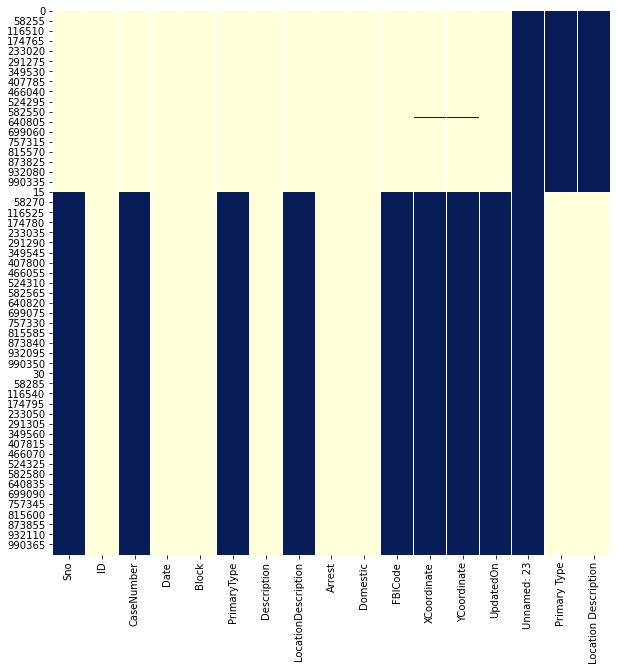

In [11]:
# Let's see how many null elements are contained in the data
plt.figure(figsize=(10,10))
sns.heatmap(chicago_df.isnull(), cbar = False, cmap = 'YlGnBu')

In [29]:
# ID Case Number Date Block IUCR Primary Type Description Location Description Arrest Domestic Beat District Ward Community Area FBI Code X Coordinate Y Coordinate Year Updated On Latitude Longitude Location
chicago_df.drop(['Location Description'], inplace=True, axis=1)

In [30]:
chicago_df

,ID,Date,Block,PrimaryType,Description,LocationDescription,Arrest,Domestic
0,4673626,04-02-2006 13:00,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
1,4673627,02/26/2006 01:40:48 PM,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False
2,4673628,01-08-2006 23:16,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False
3,4673629,04-05-2006 18:45,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False
4,4673630,02/17/2006 09:03:14 PM,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False
...,...,...,...,...,...,...,...,...
1048570,10111143,06/13/2015 04:12:00 PM,036XX W GRENSHAW ST,NaN,TO PROPERTY,NaN,False,True
1048571,10111144,06/13/2015 09:30:00 PM,014XX S MUSEUM CAMPUS DR,NaN,POCKET-PICKING,NaN,False,False
1048572,10111146,06/13/2015 09:40:00 PM,023XX W LAWRENCE AVE,NaN,SIMPLE,NaN,True,False
1048573,10111147,06/13/2015 08:40:00 PM,051XX W THOMAS ST,NaN,ARMED: OTHER DANGEROUS WEAPON,NaN,False,False


In [34]:
# setting the index to be the date 
chicago_df.index = pd.DatetimeIndex(chicago_df.Date)

In [35]:
chicago_df

,ID,Date,Block,PrimaryType,Description,LocationDescription,Arrest,Domestic
Date,,,,,,,,
2006-04-02 13:00:00,4673626,04-02-2006 13:00,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False
2006-02-26 13:40:48,4673627,02/26/2006 01:40:48 PM,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False
2006-01-08 23:16:00,4673628,01-08-2006 23:16,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False
2006-04-05 18:45:00,4673629,04-05-2006 18:45,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False
2006-02-17 21:03:14,4673630,02/17/2006 09:03:14 PM,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False
...,...,...,...,...,...,...,...,...
2015-06-13 16:12:00,10111143,06/13/2015 04:12:00 PM,036XX W GRENSHAW ST,NaN,TO PROPERTY,NaN,False,True
2015-06-13 21:30:00,10111144,06/13/2015 09:30:00 PM,014XX S MUSEUM CAMPUS DR,NaN,POCKET-PICKING,NaN,False,False
2015-06-13 21:40:00,10111146,06/13/2015 09:40:00 PM,023XX W LAWRENCE AVE,NaN,SIMPLE,NaN,True,False


In [37]:
chicago_df['PrimaryType'].value_counts()

THEFT                               197319
BATTERY                             190674
NARCOTICS                           142127
CRIMINAL DAMAGE                     129549
OTHER OFFENSE                        63625
ASSAULT                              61549
BURGLARY                             56481
MOTOR VEHICLE THEFT                  47448
ROBBERY                              36267
CRIMINAL TRESPASS                    33301
DECEPTIVE PRACTICE                   31465
PROSTITUTION                         17019
WEAPONS VIOLATION                     8923
PUBLIC PEACE VIOLATION                7699
OFFENSE INVOLVING CHILDREN            6339
SEX OFFENSE                           3635
GAMBLING                              3392
CRIM SEXUAL ASSAULT                   3375
LIQUOR LAW VIOLATION                  2960
INTERFERENCE WITH PUBLIC OFFICER      1741
ARSON                                 1729
KIDNAPPING                             797
INTIMIDATION                           664
STALKING   

In [38]:
chicago_df['PrimaryType'].value_counts().iloc[:15]

THEFT                         197319
BATTERY                       190674
NARCOTICS                     142127
CRIMINAL DAMAGE               129549
OTHER OFFENSE                  63625
ASSAULT                        61549
BURGLARY                       56481
MOTOR VEHICLE THEFT            47448
ROBBERY                        36267
CRIMINAL TRESPASS              33301
DECEPTIVE PRACTICE             31465
PROSTITUTION                   17019
WEAPONS VIOLATION               8923
PUBLIC PEACE VIOLATION          7699
OFFENSE INVOLVING CHILDREN      6339
Name: PrimaryType, dtype: int64

In [39]:
chicago_df['PrimaryType'].value_counts().iloc[:15].index

Index(['THEFT', 'BATTERY', 'NARCOTICS', 'CRIMINAL DAMAGE', 'OTHER OFFENSE',
       'ASSAULT', 'BURGLARY', 'MOTOR VEHICLE THEFT', 'ROBBERY',
       'CRIMINAL TRESPASS', 'DECEPTIVE PRACTICE', 'PROSTITUTION',
       'WEAPONS VIOLATION', 'PUBLIC PEACE VIOLATION',
       'OFFENSE INVOLVING CHILDREN'],
      dtype='object')

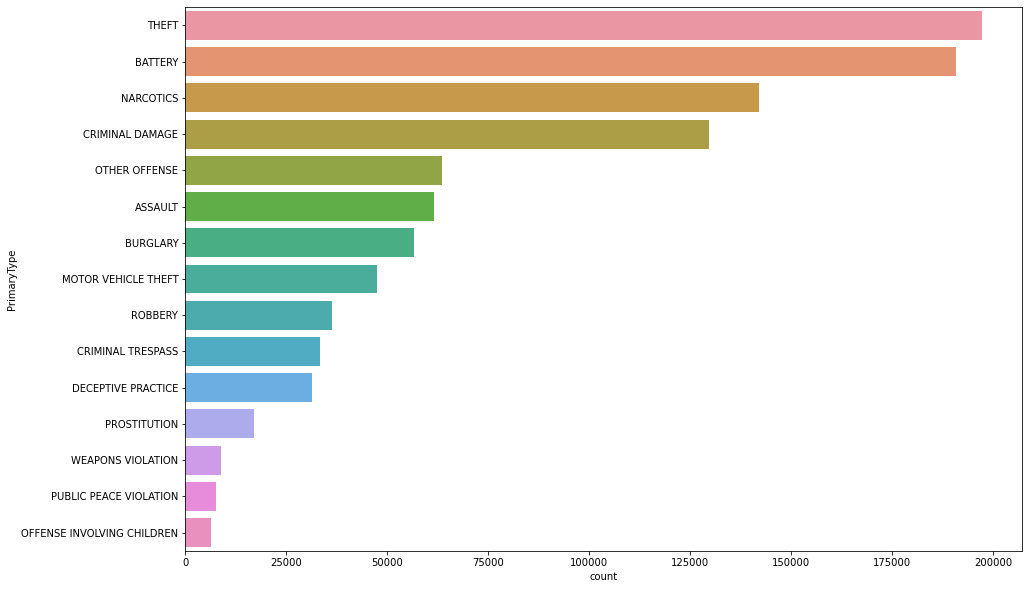

In [40]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'PrimaryType', data = chicago_df, order = chicago_df['PrimaryType'].value_counts().iloc[:15].index)

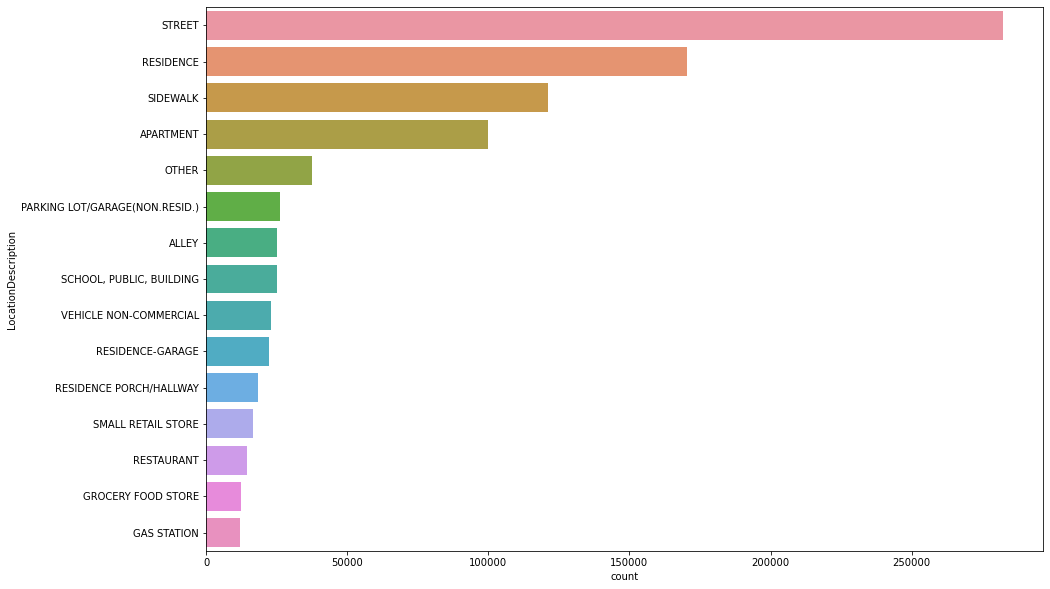

In [42]:
plt.figure(figsize = (15, 10))
sns.countplot(y= 'LocationDescription', data = chicago_df, order = chicago_df['LocationDescription'].value_counts().iloc[:15].index)

In [43]:
chicago_df.resample('Y').size()

Date
2005-12-31      4275
2006-12-31    693156
2007-12-31    351144
2008-12-31    426389
2009-12-31    391597
2010-12-31    230054
2011-12-31       535
2012-12-31    334715
2013-12-31    305738
2014-12-31    273222
2015-12-31    109685
2016-12-31     25215
Freq: A-DEC, dtype: int64

Text(0, 0.5, 'Number of Crimes')

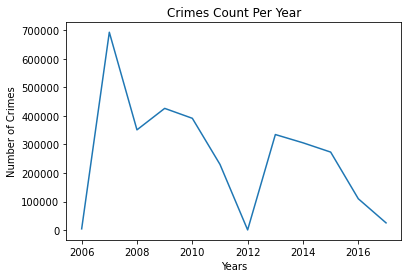

In [44]:
# Resample is a Convenience method for frequency conversion and resampling of time series.

plt.plot(chicago_df.resample('Y').size())
plt.title('Crimes Count Per Year')
plt.xlabel('Years')
plt.ylabel('Number of Crimes')

In [45]:
chicago_df.resample('M').size()

Date
2005-01-31      282
2005-02-28      114
2005-03-31      135
2005-04-30      186
2005-05-31      214
              ...  
2016-01-31     2508
2016-02-29      123
2016-03-31      215
2016-04-30     2137
2016-05-31    20232
Freq: M, Length: 137, dtype: int64

Text(0, 0.5, 'Number of Crimes')

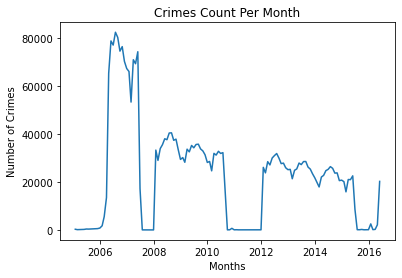

In [63]:
# Resample is a Convenience method for frequency conversion and resampling of time series.

plt.plot(chicago_df.resample('M').size())
plt.title('Crimes Count Per Month')
plt.xlabel('Months')
plt.ylabel('Number of Crimes')

In [47]:
chicago_df.resample('Q').size()

Date
2005-03-31       531
2005-06-30       774
2005-09-30      1166
2005-12-31      1804
2006-03-31     20749
2006-06-30    221170
2006-09-30    237236
2006-12-31    214001
2007-03-31    190310
2007-06-30    160818
2007-09-30        16
2007-12-31         0
2008-03-31     96194
2008-06-30    111161
2008-09-30    118253
2008-12-31    100781
2009-03-31     92032
2009-06-30    102011
2009-09-30    105148
2009-12-31     92406
2010-03-31     85095
2010-06-30     95882
2010-09-30     48317
2010-12-31       760
2011-03-31       145
2011-06-30       134
2011-09-30       120
2011-12-31       136
2012-03-31     78333
2012-06-30     88063
2012-09-30     89414
2012-12-31     78905
2013-03-31     71441
2013-06-30     80546
2013-09-30     83240
2013-12-31     70511
2014-03-31     59684
2014-06-30     72699
2014-09-30     75745
2014-12-31     65094
2015-03-31     57009
2015-06-30     52108
2015-09-30       366
2015-12-31       202
2016-03-31      2846
2016-06-30     22369
Freq: Q-DEC, dtype: int64

Text(0, 0.5, 'Number of Crimes')

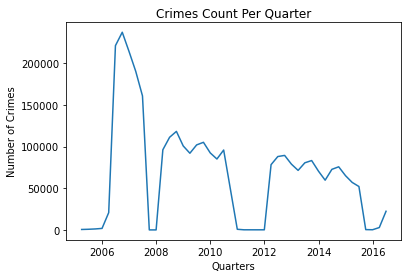

In [48]:
# Resample is a Convenience method for frequency conversion and resampling of time series.

plt.plot(chicago_df.resample('Q').size())
plt.title('Crimes Count Per Quarter')
plt.xlabel('Quarters')
plt.ylabel('Number of Crimes')

# STEP #3: PREPARING THE DATA

In [49]:
chicago_prophet = chicago_df.resample('M').size().reset_index()

In [50]:
chicago_prophet

,Date,0
0,2005-01-31,282
1,2005-02-28,114
2,2005-03-31,135
3,2005-04-30,186
4,2005-05-31,214
...,...,...
132,2016-01-31,2508
133,2016-02-29,123
134,2016-03-31,215
135,2016-04-30,2137


In [51]:
chicago_prophet.columns = ['Date', 'Crime Count']

In [52]:
chicago_prophet

,Date,Crime Count
0,2005-01-31,282
1,2005-02-28,114
2,2005-03-31,135
3,2005-04-30,186
4,2005-05-31,214
...,...,...
132,2016-01-31,2508
133,2016-02-29,123
134,2016-03-31,215
135,2016-04-30,2137


In [53]:
chicago_prophet_df = pd.DataFrame(chicago_prophet)

In [54]:
chicago_prophet_df

,Date,Crime Count
0,2005-01-31,282
1,2005-02-28,114
2,2005-03-31,135
3,2005-04-30,186
4,2005-05-31,214
...,...,...
132,2016-01-31,2508
133,2016-02-29,123
134,2016-03-31,215
135,2016-04-30,2137


# STEP #4: MAKE PREDICTIONS

In [55]:
chicago_prophet_df.columns

Index(['Date', 'Crime Count'], dtype='object')

In [56]:
chicago_prophet_df_final = chicago_prophet_df.rename(columns={'Date':'ds', 'Crime Count':'y'})

In [57]:
chicago_prophet_df_final

,ds,y
0,2005-01-31,282
1,2005-02-28,114
2,2005-03-31,135
3,2005-04-30,186
4,2005-05-31,214
...,...,...
132,2016-01-31,2508
133,2016-02-29,123
134,2016-03-31,215
135,2016-04-30,2137


In [59]:
m = Prophet()
m.fit(chicago_prophet_df_final)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [60]:
# Forcasting into the future
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

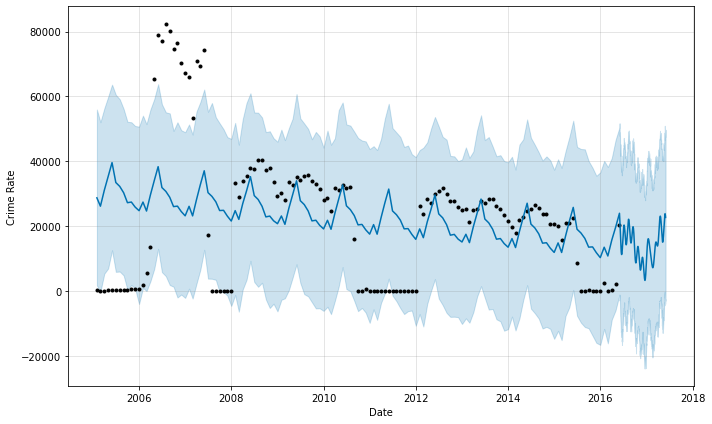

In [61]:
figure = m.plot(forecast, xlabel='Date', ylabel='Crime Rate')

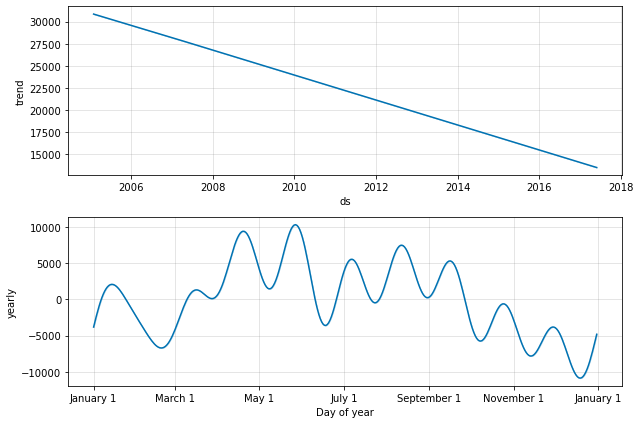

In [62]:
figure3 = m.plot_components(forecast)